In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import medfilt2d
import time

In [4]:
#input_file = 'webcam.avi'
#input_file = 'man_imgs/magpie_9.jpg'
algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()

In [7]:
capture = cv.VideoCapture(0)
capture.set(cv.CAP_PROP_FPS, 1)

True

In [8]:
capture.isOpened()

True

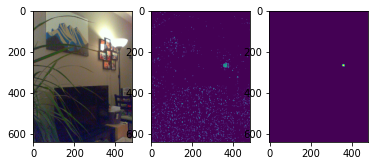

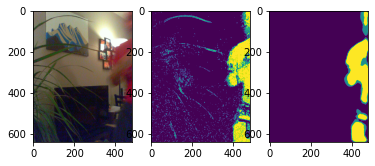

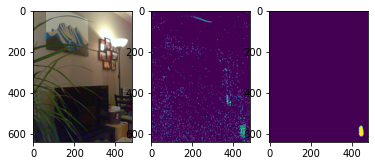

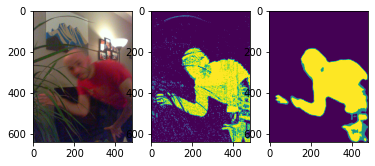

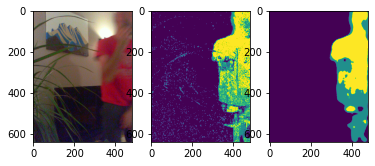

KeyboardInterrupt: 

In [11]:
mask_thresh = 127
kernel_size = 25
lr = 0.05
burn_in = 10
i = 0

while True:
    ret, frame = capture.read()
    frame = np.rot90(frame, k=-1)
    fgMask = backSub.apply(frame, learningRate=lr)
    if i < burn_in:
        i += 1
        continue
    # Threshold mask
    fgMaskMedian = medfilt2d(fgMask, kernel_size)
    if (fgMaskMedian >= mask_thresh).any():
        fig, axs = plt.subplots(1, 3)
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        axs[0].imshow(frame)
        axs[1].imshow(fgMask)
        axs[2].imshow(fgMaskMedian)
        plt.show()

In [ ]:
capture.release() 
# Destroy all the windows 
cv.destroyAllWindows() 

In [20]:
import datetime as dt

In [22]:
dt.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

'2020-11-28_05:47:29'